In [1]:
import plotly.io as pio
pio.renderers.default = "png"

import sys
sys.path.append('../../')

from aztec_gddt.analysis.execute import execute_sim, complexity_desc
from aztec_gddt.analysis.visualizations import plot_agg_kpis, plot_inspect_vars
from aztec_gddt.analysis.metrics import *
from aztec_gddt.scenario_experiments import *
from aztec_gddt.types import *

In [2]:
from aztec_gddt.helper_types import ExperimentParamSpec

exp_spec = ExperimentParamSpec(
    params_swept_control={
        'MINIMUM_MULTIPLIER_CONGESTION': [100_000, 1_000_000, 10_000_000],
    },
    params_swept_env={
        'JUICE_PER_GWEI_MEAN': [1.1e-6, 10e-6],
        'JUICE_PER_GWEI_COV': [0.1, 0.30],
        'JUICE_PER_GWEI_SCENARIO': [JuiceGweiExchangeRateScenario.Stochastic, JuiceGweiExchangeRateScenario.StrictlyIncreasing, JuiceGweiExchangeRateScenario.StrictlyDecreasing, JuiceGweiExchangeRateScenario.Constant]
    },
    N_timesteps=1_000,
    N_samples=1,
    N_config_sample=-1,
    relevant_per_trajectory_metrics=['T-M1', 'T-M2', 'T-M3'],
    relevant_per_trajectory_group_metrics=['TG-M1', 'TG-M2', 'TG-M4', 'TG-M5'],
)

print(complexity_desc(exp_spec))


    #### Computational Complexity:
    1. Total number of parameter combinations: 48
    2. Total number of Monte Carlo runs per parameter combination: 1
    3. Total number of trajectories: 48
    4. Total number of timesteps per trajectory: 1,000
    5. Total number of state measurements: 48,000
    


In [3]:
CONTROL_PARAMS = list(exp_spec.params_swept_control.keys())

sim_df, exec_time = execute_sim(exp_spec, return_sim_df=True, upload=False, parallelize=False)


2025-02-05 18:30:56 - aztec-gddt-v2 - INFO
{exp_spec.label} Run invoked at 2025-02-05 18:30:56.336465

2025-02-05 18:30:56 - aztec-gddt-v2 - INFO
 dimensions: N_jobs=7, N_t=1,000, N_sweeps=48, N_mc=1, N_trajectories=48, N_measurements=48,000

2025-02-05 18:30:56 - aztec-gddt-v2 - INFO
 starting at 2025-02-05 18:30:56.337418, (0:00:00.000953 since invoke)

2025-02-05 18:31:23 - aztec-gddt-v2 - INFO
 Run finished at 2025-02-05 18:31:23.905449, (0:00:27.568031 since sim start)

2025-02-05 18:31:23 - aztec-gddt-v2 - INFO
 Run Performance Numbers; Duration (s): 27.57, Measurements Per Second: 1,741.15 M/s, Measurements per Job * Second: 248.74 M/(J*s), Jobs * Seconds per Trajectory : 4.02


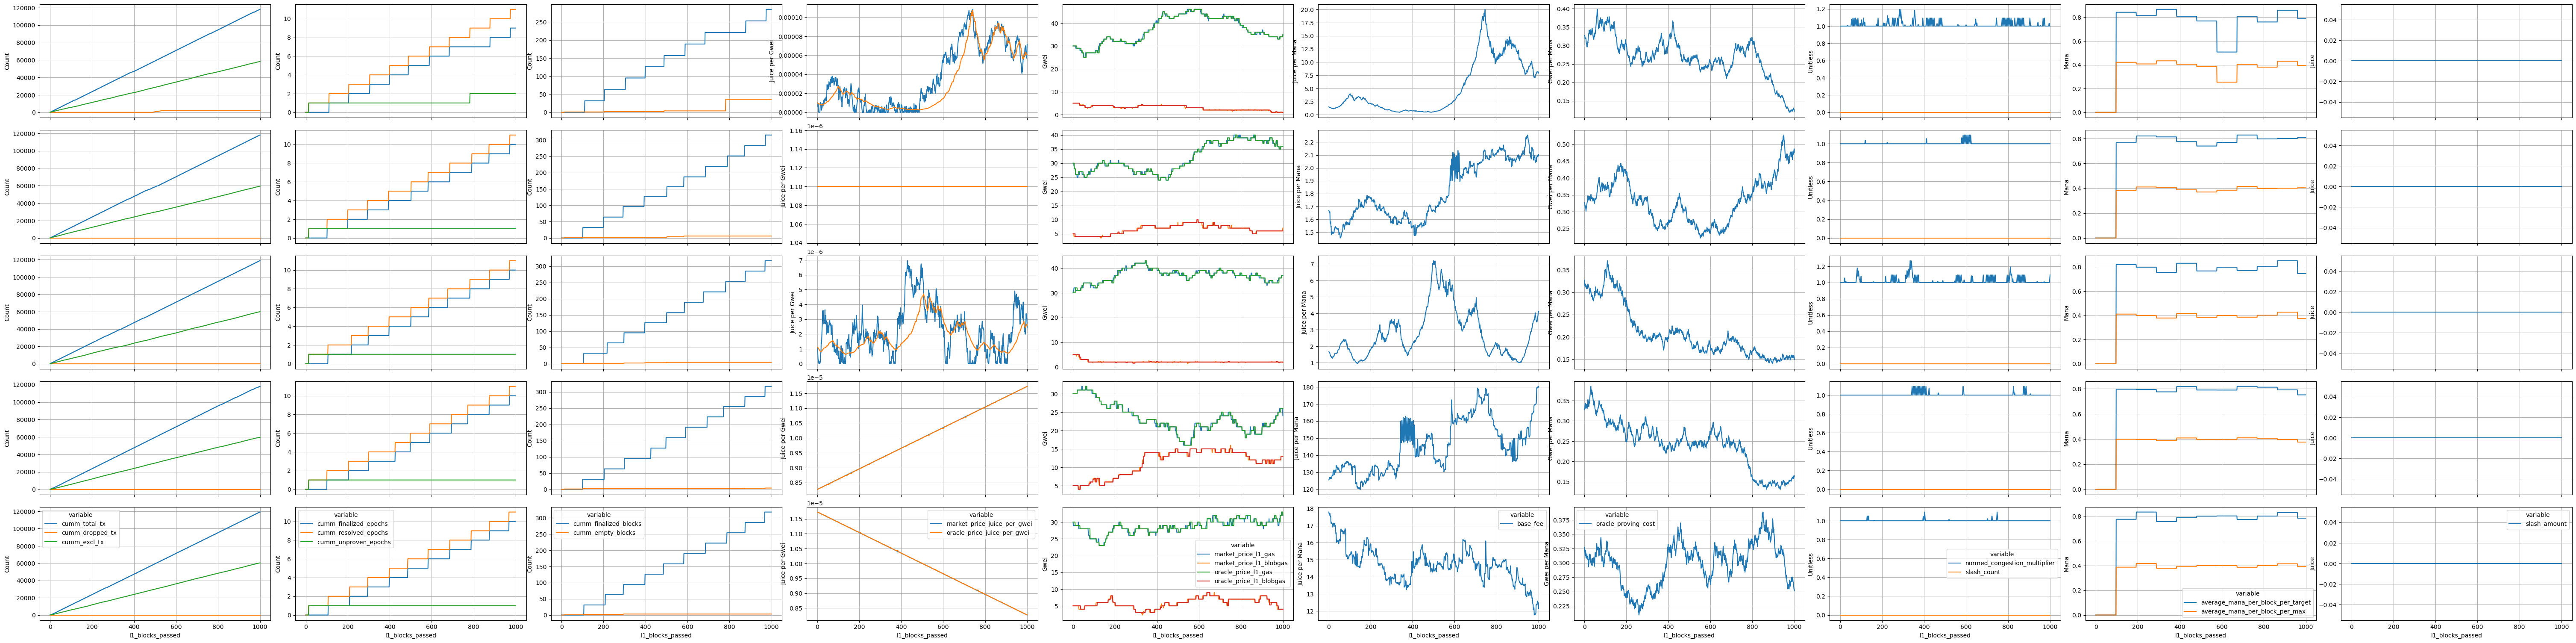

In [4]:
plot_inspect_vars(sim_df)

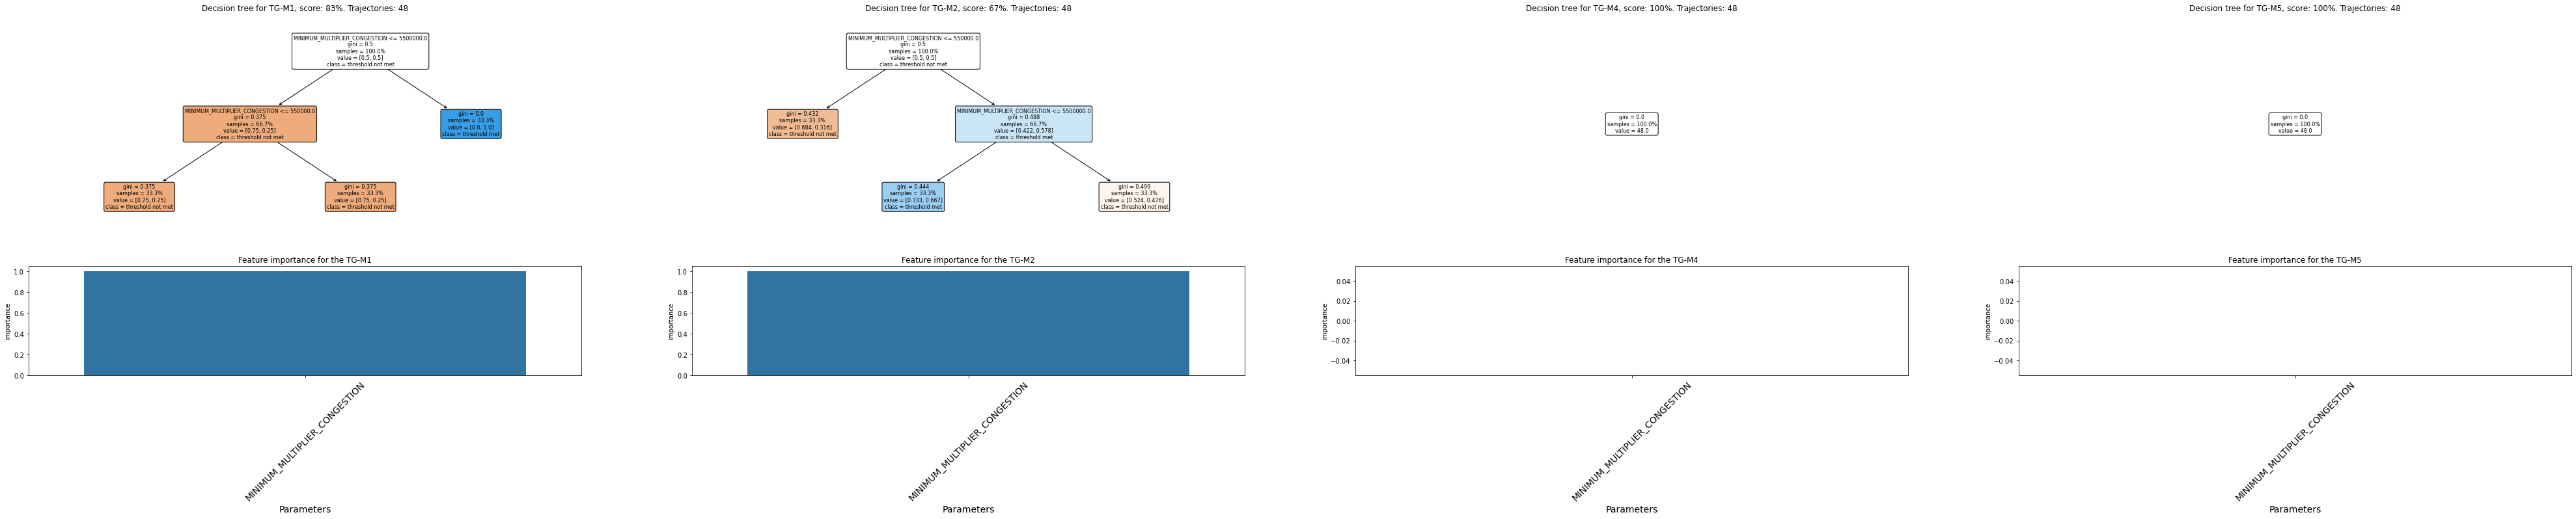

In [5]:
agg_df, c_agg_df = retrieve_feature_df(sim_df, CONTROL_PARAMS, exp_spec.relevant_per_trajectory_group_metrics)
plot_agg_kpis(c_agg_df, exp_spec.params_swept_control, exp_spec.relevant_per_trajectory_group_metrics)

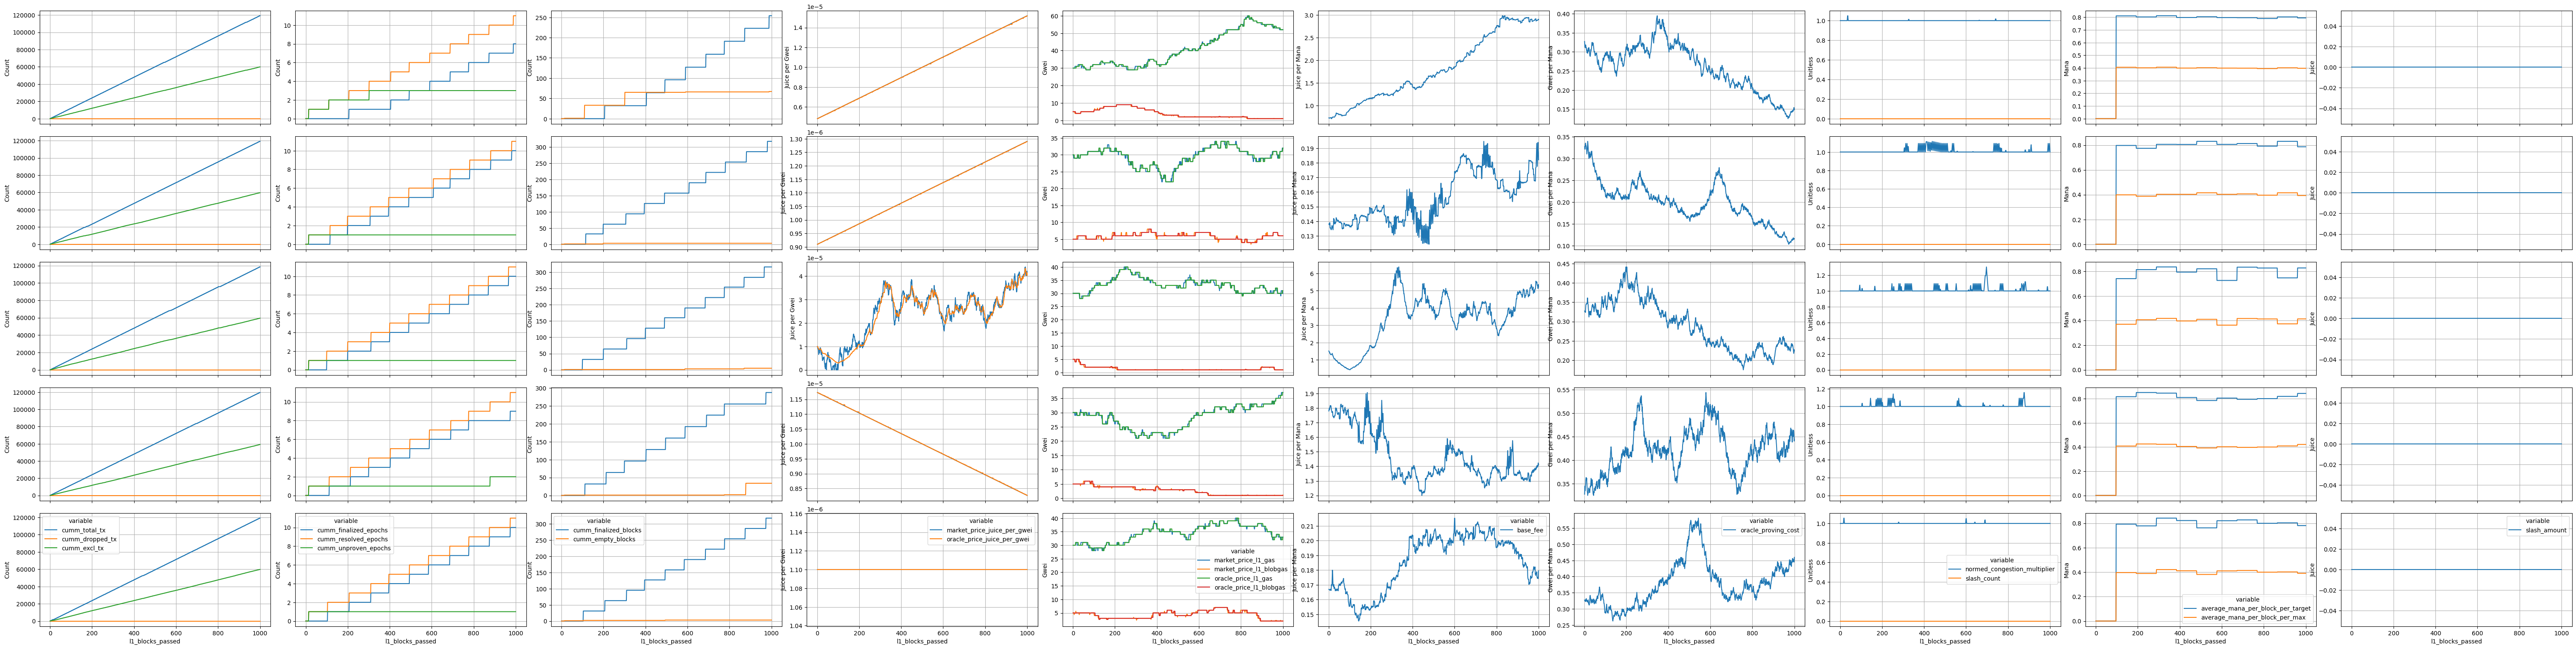

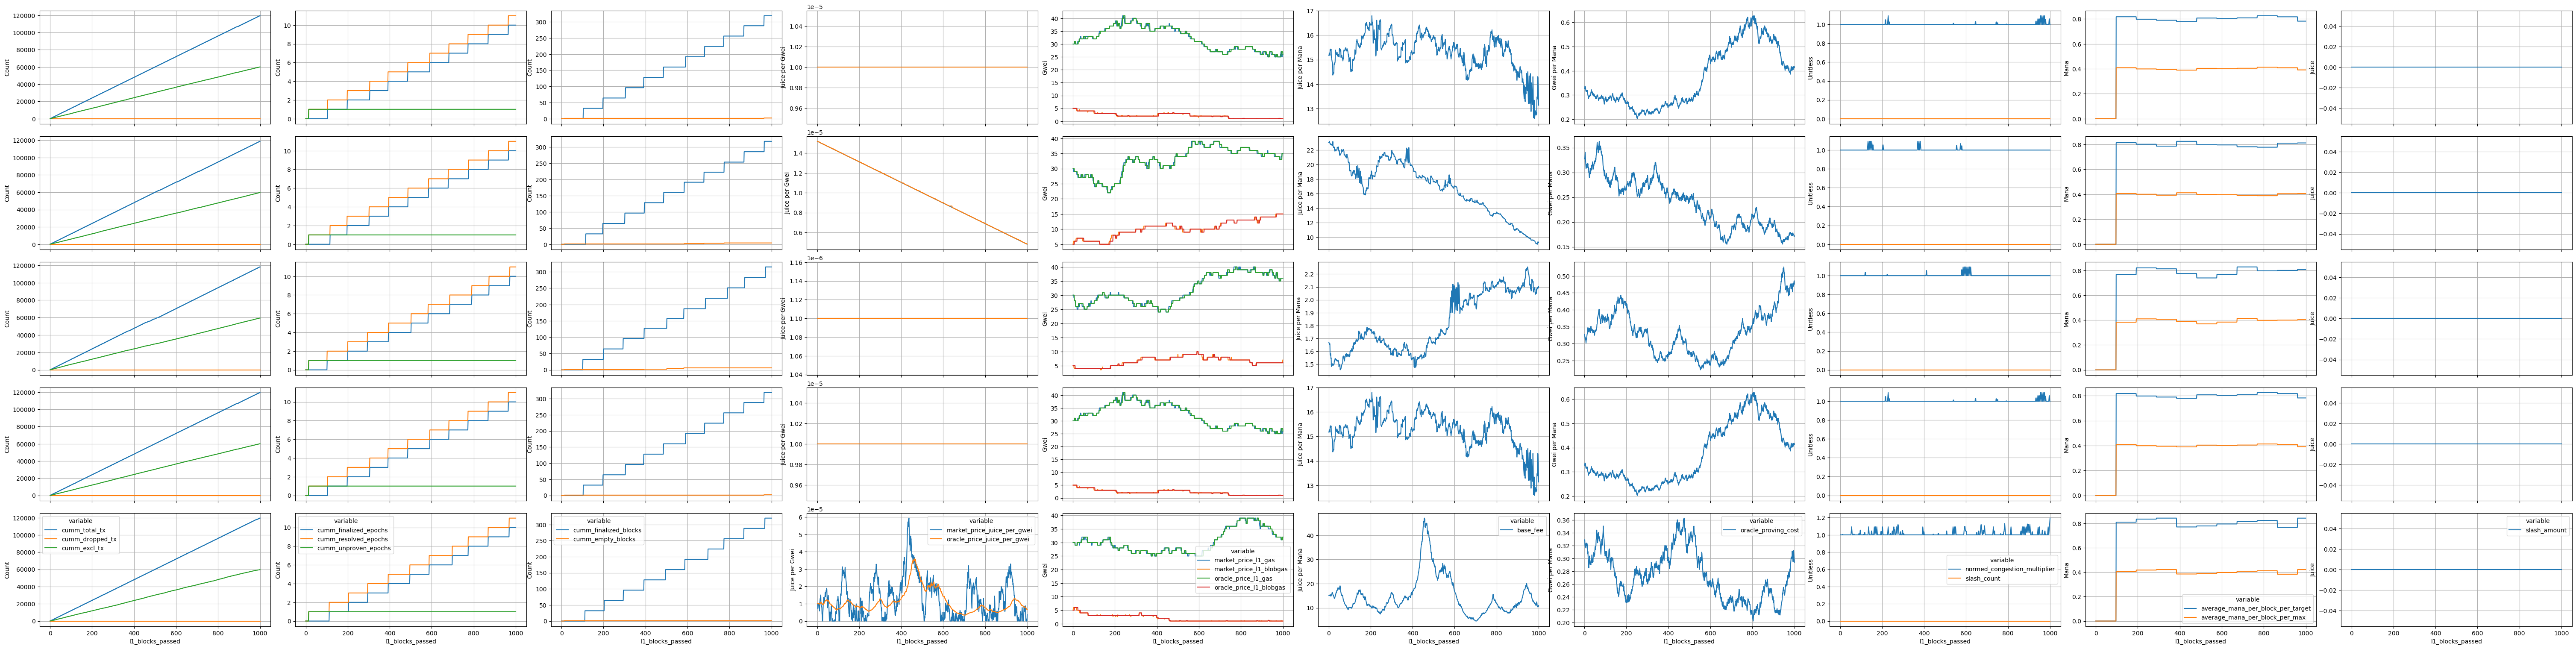

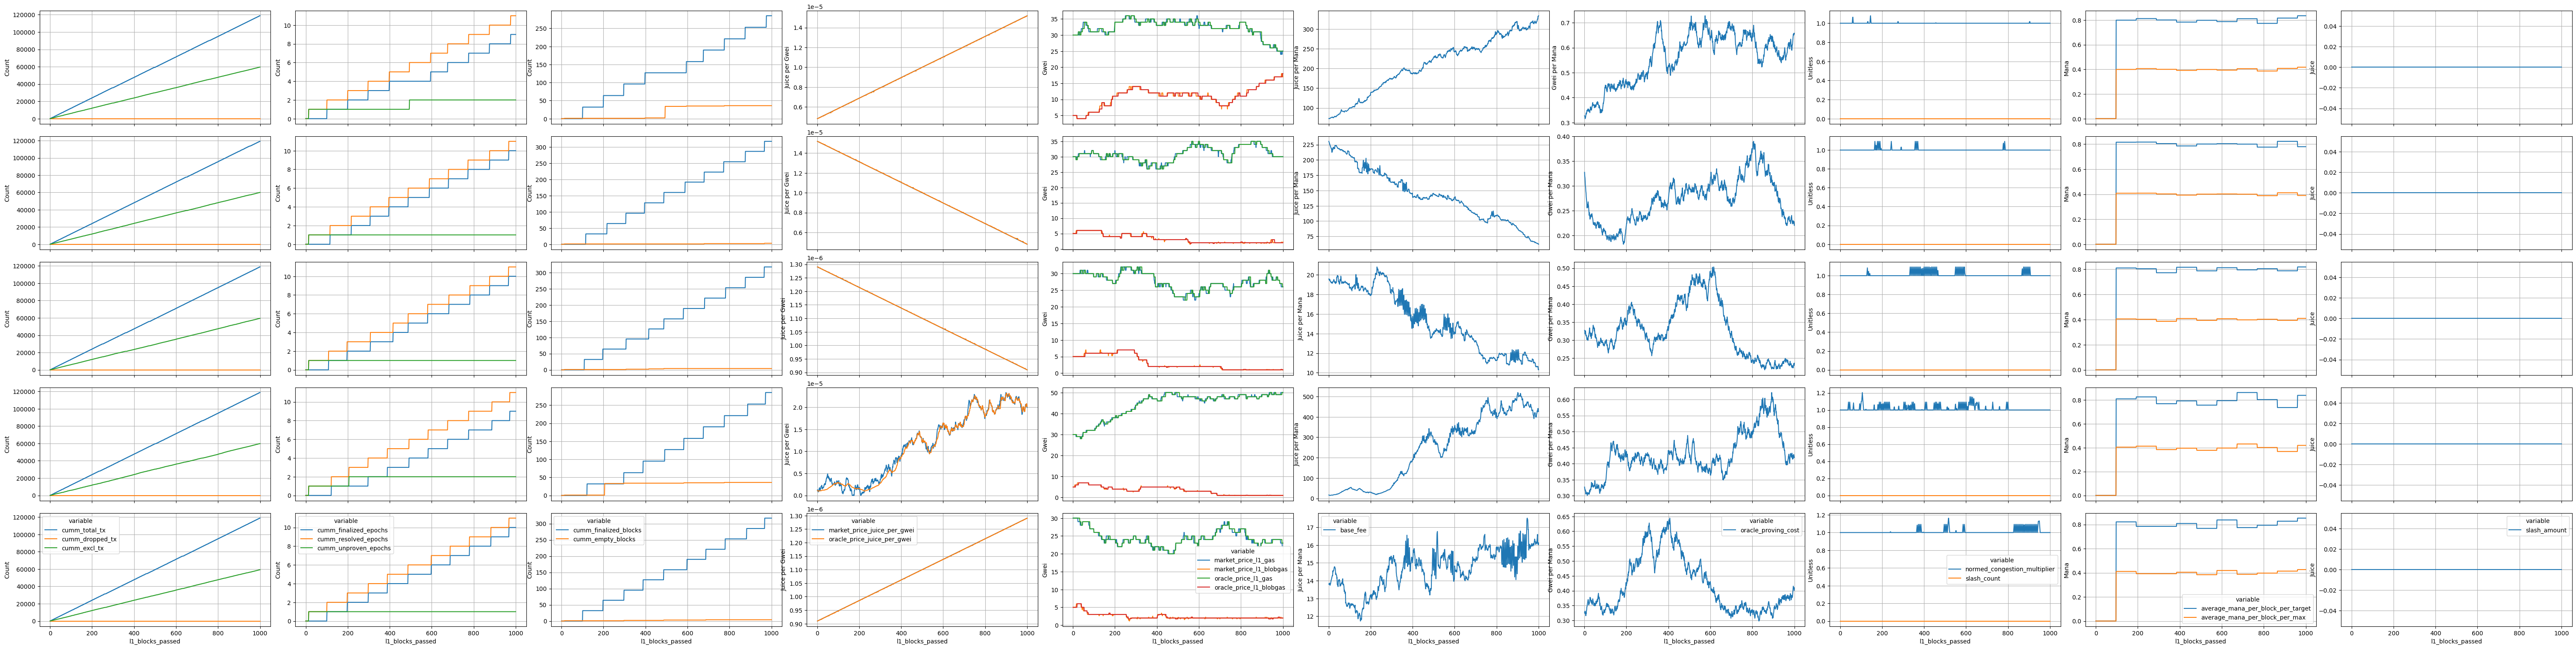

In [6]:
for v in exp_spec.params_swept_control['MINIMUM_MULTIPLIER_CONGESTION']:
    plot_inspect_vars(sim_df.query(f'MINIMUM_MULTIPLIER_CONGESTION == {v}'))